In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans , AgglomerativeClustering , DBSCAN
from sklearn.metrics import silhouette_score , silhouette_samples
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage




In [2]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [9]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

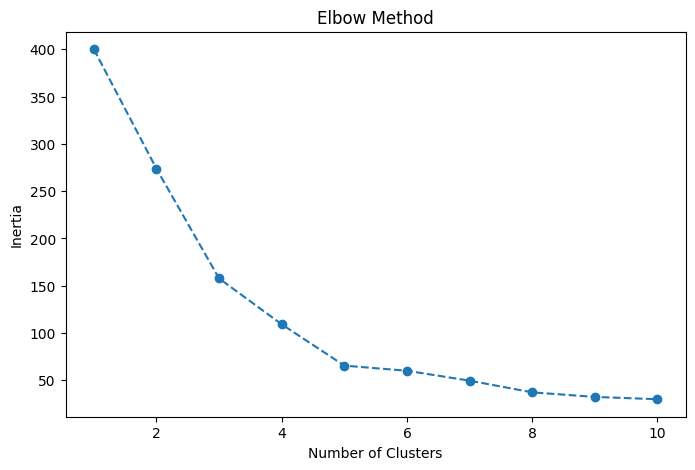

In [11]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [17]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

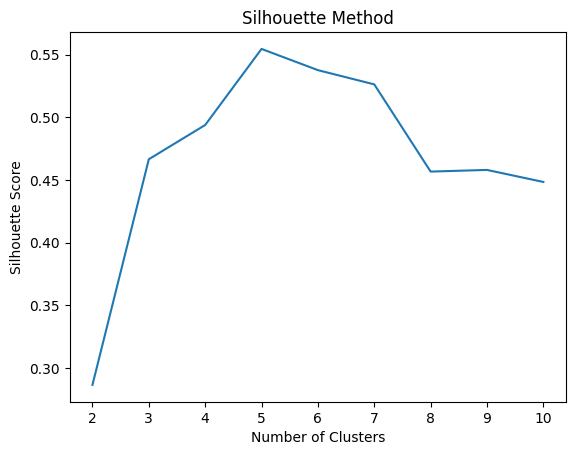

Silhouette Scores: [np.float64(0.28640637225274423), np.float64(0.46658474419000145), np.float64(0.4939069237513199), np.float64(0.5546571631111091), np.float64(0.5377141165734254), np.float64(0.5263454490712252), np.float64(0.4567208019716266), np.float64(0.45805265701012743), np.float64(0.44843303299447385)]


In [20]:
plt.figure()
plt.plot(range(2,11), sil_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()

print("Silhouette Scores:", sil_scores)


KMeans Silhouette Score: 0.5546571631111091


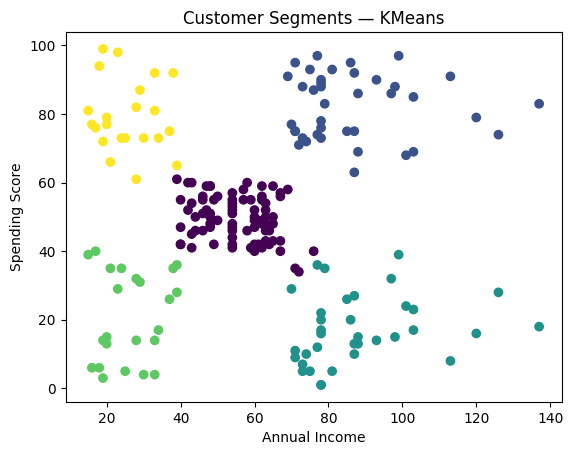

In [24]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
k_labels = kmeans.fit_predict(X_scaled)

data['kmeans_cluster'] = k_labels
print("\nKMeans Silhouette Score:",
      silhouette_score(X_scaled, k_labels))

plt.figure()
plt.scatter(data["Annual Income (k$)"],
            data["Spending Score (1-100)"],
            c=k_labels)

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segments — KMeans")
plt.show()


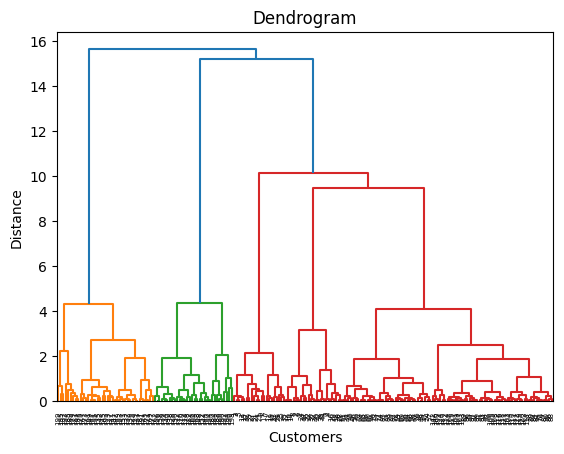

In [25]:
plt.figure()
linkage_data = linkage(X_scaled, method="ward")
dendrogram(linkage_data)
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

Hierarchical Silhouette Score: 0.5538089226688662


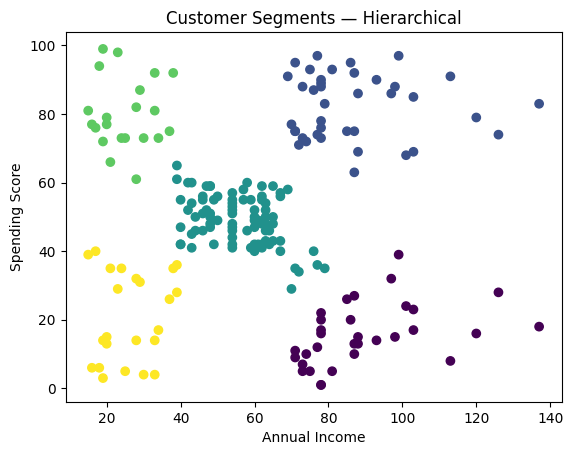

In [26]:
hier = AgglomerativeClustering(n_clusters=5)
h_labels = hier.fit_predict(X_scaled)
data["Hierarchical_Cluster"] = h_labels

print("Hierarchical Silhouette Score:",
      silhouette_score(X_scaled, h_labels))

plt.figure()
plt.scatter(data["Annual Income (k$)"],
            data["Spending Score (1-100)"],
            c=h_labels)

plt.title("Customer Segments — Hierarchical")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

DBSCAN Silhouette Score: 0.3875583892728279


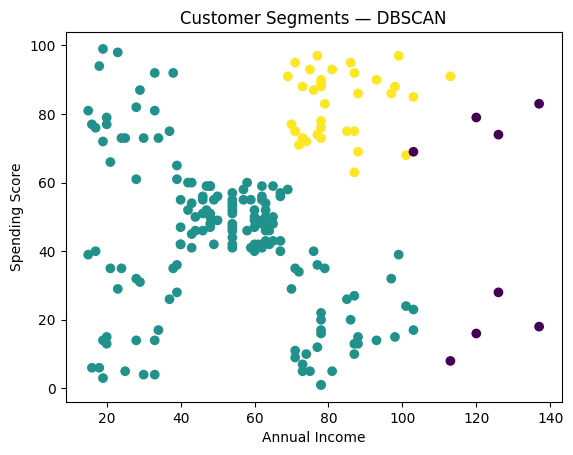

In [27]:
db = DBSCAN(eps=0.5, min_samples=5)
d_labels = db.fit_predict(X_scaled)

data["DBSCAN_Cluster"] = d_labels


mask = d_labels != -1

if len(set(d_labels[mask])) > 1:
    print("DBSCAN Silhouette Score:",
          silhouette_score(X_scaled[mask], d_labels[mask]))
else:
    print("DBSCAN: Not enough clusters for silhouette score")

plt.figure()
plt.scatter(data["Annual Income (k$)"],
            data["Spending Score (1-100)"],
            c=d_labels)

plt.title("Customer Segments — DBSCAN")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()
